Accuracy: 0.9854545454545455

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275


Confusion Matrix:
 [[146   2]
 [  2 125]]


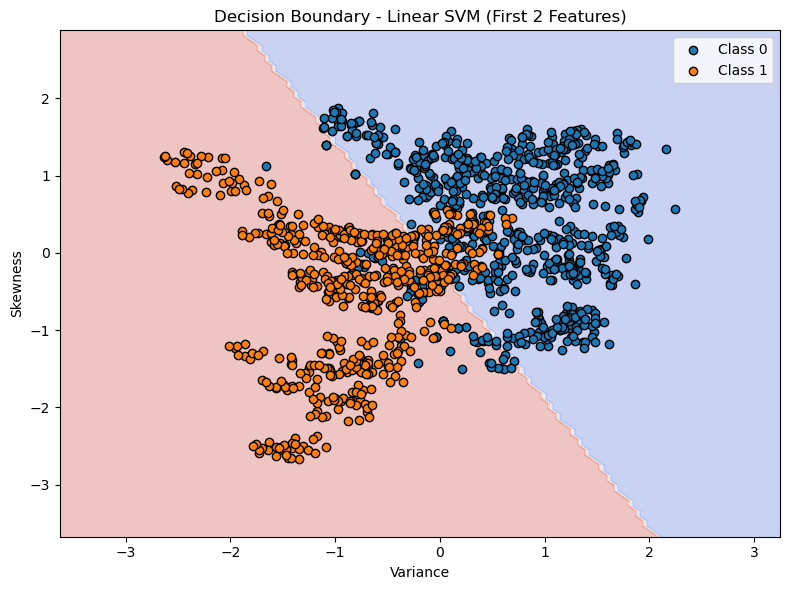

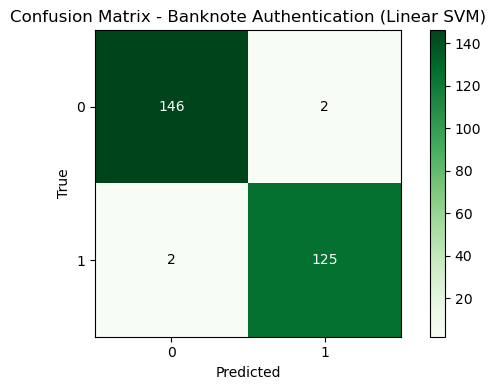

In [2]:
# Linear SVM Classification - Banknote Authentication Dataset

# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("data_banknote_authentication.csv", header=None)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

X = df.drop('class', axis=1)
y = df['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Standardize features
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Train SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_scaler, y_train)

# Predict
y_pred = svm.predict(X_test_scaler)

# Evaluate 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

def plot_linear_svm_decision_boundary(X, y, model, feature_names):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(grid)
    zz = zz.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, zz, alpha=0.3, cmap=plt.cm.coolwarm)

    for class_value in np.unique(y):
        idx = y == class_value
        plt.scatter(X[idx, 0], X[idx, 1], label=f"Class {class_value}", edgecolor='k')

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Decision Boundary - Linear SVM (First 2 Features)")
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Prepare 2D data for visualization
X_vis = X[['variance', 'skewness']].values
y_vis = y

# Scale the 2D data
X_vis_scaled = scaler.fit_transform(X_vis)

# Train another model on just 2 features for plotting
svm_vis = SVC(kernel='linear', C=1.0, random_state=42)
svm_vis.fit(X_vis_scaled, y_vis)

# Plot decision boundary
plot_linear_svm_decision_boundary(X_vis_scaled, y_vis, svm_vis, ['Variance', 'Skewness'])

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Banknote Authentication (Linear SVM)")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

# Label each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


      
      